Author: Wenqi Hu, Shanshan Liu

# define golbal variable


In [4]:
method='Logistic Regression'
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary ')

# Analyse Data|

## Gisette

307
109
38
13


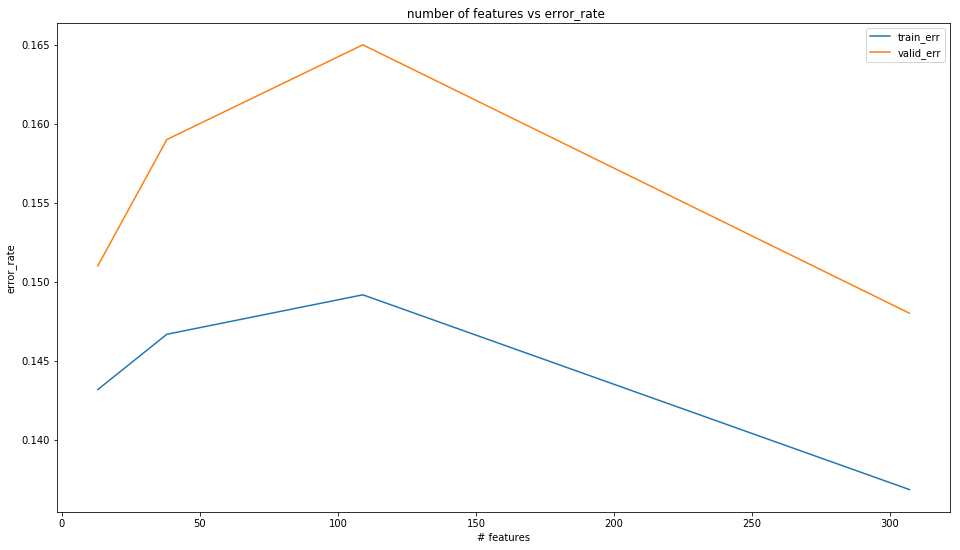

In [18]:
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('Gisette\gisette')
lambd_list=[0.105,0.175,0.24,0.268]
calculate_err(lambd_list,train_X_N,train_Y_N,valid_X_N,valid_Y_N)

##  MADELON

305
114
36
14


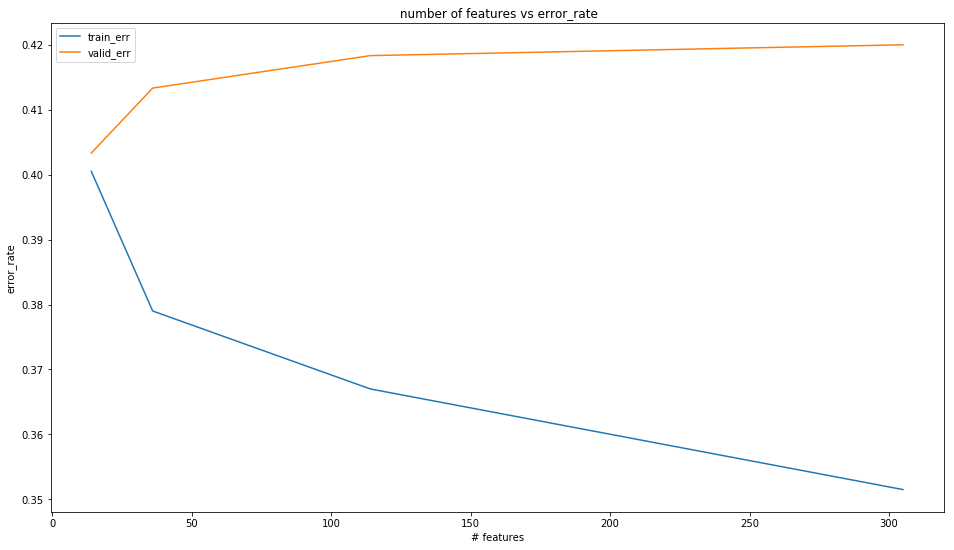

In [23]:
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('MADELON\madelon')
lambd_list=[0.0063,0.015,0.023,0.031]
calculate_err(lambd_list,train_X_N,train_Y_N,valid_X_N,valid_Y_N)

## Arcene

300
104
30
10


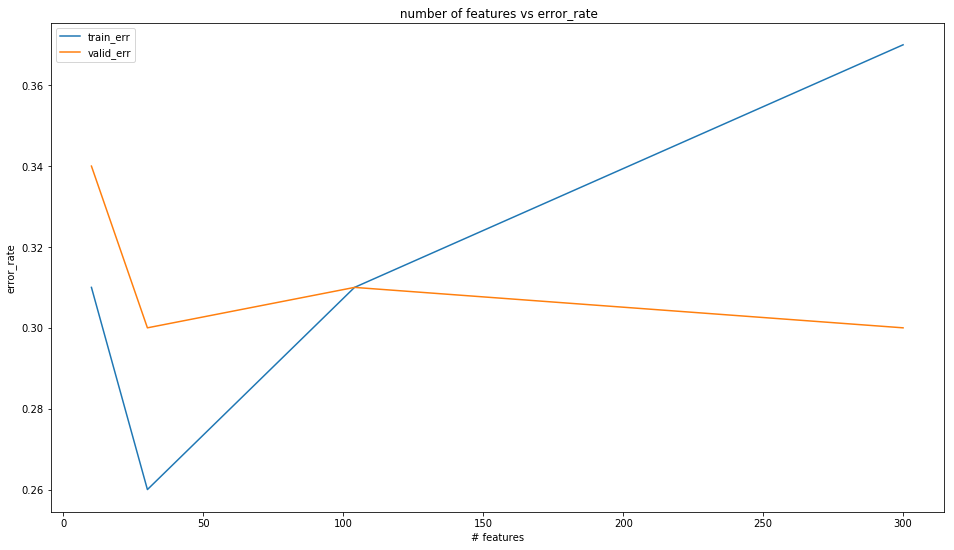

In [24]:
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file(r'arcene\arcene')
lambd_list=[0.1635,0.179,0.195,0.21]
calculate_err(lambd_list,train_X_N,train_Y_N,valid_X_N,valid_Y_N)

# Function

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

def norm(X,Y):
    norm_X=(X-np.mean(X))/np.std(X)
    return np.nan_to_num(np.array(norm_X).T),np.array((Y+1)/2).T

def read_file(name):
    train_X=pd.read_csv(name+'_train.data',sep=' ',header=None)
    train_Y=pd.read_csv(name+'_train.labels',header=None).iloc[:,0]
    valid_X=pd.read_csv(name+'_valid.data',sep=' ',header=None)
    valid_Y=pd.read_csv(name+'_valid.labels',header=None).iloc[:,0]
    train_X=train_X.iloc[:,:-1]
    valid_X=valid_X.iloc[:,:-1]
    train_X_N,train_Y_N=norm(train_X,train_Y)
    valid_X_N,valid_Y_N=norm(valid_X,valid_Y)
    return train_X_N,train_Y_N,valid_X_N,valid_Y_N

def initiallize(X):
    m,n_x=X.shape
    W=np.zeros(m)
    return W

def forward(X,W):
    Z=np.dot(W,X)
    A=np.longfloat(1/(1+np.exp(-Z)))
    return A

def theta(W,lambd,n_x):
    W0=W.copy()
    drop=np.abs(W0)<lambd
    keep=np.abs(W0)>=lambd
    W0[drop]=0
    W0[keep]=W0[keep]/(1+1/n_x)
    return W0

def update_parameters(X,Y,repeat,lambd,method):
    m,n_x=X.shape
    W=initiallize(X)
    for i in range(1,repeat):
        temp_W=np.array(W)
        A=forward(X,temp_W)
        W=theta(temp_W+(1/n_x)*np.dot(X,Y-A),lambd,n_x)
        return W

def prediction(W,X,Y):
    A=forward(X,W)
    Y_hat=A>0.5
    return sum(np.abs(Y_hat-Y))/Y.shape[0]

def calculate_err(lambd_list,train_X,train_Y,test_X,test_Y):
    train_err_rate=[]
    test_err_rate=[]
    selected_num=[]
    for i in lambd_list:
        W=update_parameters(train_X,train_Y,100,i,'Logistic regression')
        print(sum(W!=0))
        train_err=prediction(W,train_X,train_Y)
        test_err = prediction(W,test_X,test_Y)
        train_err_rate.append(train_err)
        test_err_rate.append(test_err)
        selected_num.append(np.sum(W!=0))
    return plot_result(train_err_rate,test_err_rate,selected_num)

def plot_result(train_err_rate,pred_err_rate,selected_num):
    plt.figure(figsize=(16,9))  
    plt.plot(selected_num,train_err_rate)
    plt.plot(selected_num,pred_err_rate)
    plt.title(' number of features vs error_rate')
    plt.xlabel('# features')
    plt.ylabel('error_rate')
    plt.legend(['train_err','valid_err'])
    plt.show()
